# Introduction

The purpose of this report is to perform RNAseq analysis using test data available in the nf-core rnaseq pipeline. The report was written using the Python and R languages.

# Quality control of the data

## Quality of raw data

The test data used have good quality, as can be seen in the example per_base_quality graphs for each sample.

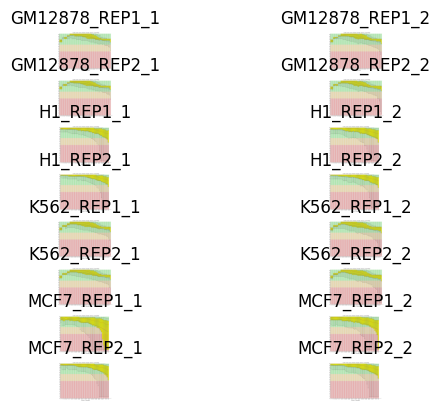

In [1]:
import os

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio

pio.renderers.default = (
    "iframe"  # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'
)
import numpy as np
import pandas as pd
import PIL

sample_names = np.array(
    [
        "GM12878_REP1_1",
        "GM12878_REP1_2",
        "GM12878_REP2_1",
        "GM12878_REP2_2",
        "H1_REP1_1",
        "H1_REP1_2",
        "H1_REP2_1",
        "H1_REP2_2",
        "K562_REP1_1",
        "K562_REP1_2",
        "K562_REP2_1",
        "K562_REP2_2",
        "MCF7_REP1_1",
        "MCF7_REP1_2",
        "MCF7_REP2_1",
        "MCF7_REP2_2",
    ]
)

path = "/mnt/pool/playground/smigas/test-full/"
path_qc = path + "fastqc/"

for num, x in enumerate(sample_names):
    path_sample = path_qc + x
    img = PIL.Image.open(path_sample + "_fastqc/Images/per_base_quality.png")
    plt.subplot(8, 2, num + 1)
    plt.title(x.split(".")[0])
    plt.axis("off")
    plt.rcParams["figure.figsize"] = [13, 12]
    plt.imshow(img)

## Total sample counts

In [2]:
raw_counts = pd.read_csv(path + "salmon/salmon.merged.gene_counts.tsv", sep="\t")
raw_counts = raw_counts.drop(labels="gene_id", axis=1)
raw_counts = raw_counts.set_index("gene_name")
gene_list = raw_counts.index
raw_counts

,GM12878_REP1,GM12878_REP2,H1_REP1,H1_REP2,K562_REP1,K562_REP2,MCF7_REP1,MCF7_REP2
gene_name,,,,,,,,
TSPAN6,8.000,0.000,8591.778,4593.954,3.000,2.000,6736.203,4243.111
TNMD,0.000,0.000,71.000,35.000,0.000,0.000,3.000,0.000
DPM1,4301.000,3755.000,2015.893,867.517,6695.001,9275.000,11453.746,11043.872
SCYL3,2083.845,1690.051,680.154,469.026,1040.584,1531.396,2280.986,2335.833
C1orf112,2016.010,1746.026,3981.890,1951.694,3122.169,3222.999,4750.223,3933.307
...,...,...,...,...,...,...,...,...
RP4-621B10.8,0.000,0.000,0.000,3.000,0.000,0.000,2.000,0.000
RP11-114I8.4,37.000,69.000,18.000,11.000,4.000,10.000,104.000,117.000
RP11-180C16.1,3.000,0.000,148.000,68.000,0.000,4.000,18.000,16.009


In [3]:
# library size
raw_counts_sum_sample = pd.DataFrame(raw_counts.sum(), columns=["lib_size"])
raw_counts_sum_sample

,lib_size
GM12878_REP1,6.960645e+07
GM12878_REP2,6.906134e+07
H1_REP1,9.965728e+07
H1_REP2,8.175698e+07
K562_REP1,6.510871e+07
K562_REP2,8.057138e+07
MCF7_REP1,9.303433e+07
MCF7_REP2,9.649578e+07


(array([1., 2., 0., 0., 2., 0., 0., 0., 1., 2.]),
 array([65108709.01500002, 68563566.20690002, 72018423.39880002,
        75473280.5907    , 78928137.7826    , 82382994.9745    ,
        85837852.1664    , 89292709.3583    , 92747566.55019999,
        96202423.74209999, 99657280.93399999]),
 <BarContainer object of 10 artists>)

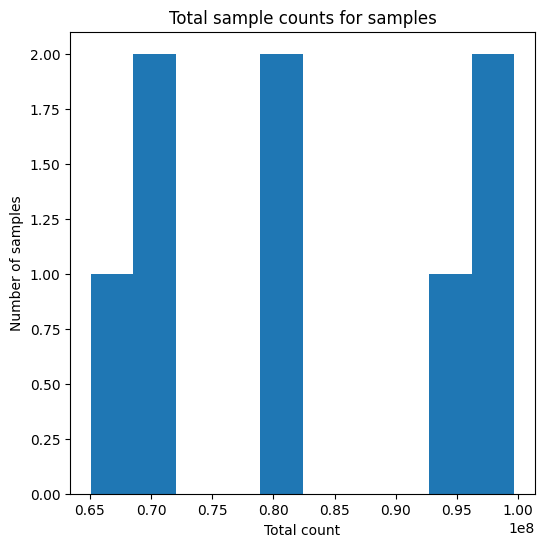

In [4]:
# matplotlib
plt.figure(figsize=(6, 6))
plt.xlabel("Total count")
plt.ylabel("Number of samples")
plt.title("Total sample counts for samples")
plt.hist(raw_counts_sum_sample)

In [5]:
# plotly
fig = px.histogram(
    raw_counts_sum_sample,
    x="lib_size",
    width=800,
    height=400,
    labels={"lib_size": "Total count"},
)
fig.update_layout(title="Total sample counts for samples")
fig.show()

## Heatmap

In [6]:
sample_dist = pd.read_csv(
    path + "star_salmon/deseq2_qc/deseq2.sample.dists.txt", sep="\t"
)
sample_dist = sample_dist.set_index("sample")
sample_dist
fig = px.imshow(
    sample_dist.values,
    labels=dict(x="Samples", y="Samples"),
    x=sample_dist.columns,
    y=sample_dist.columns,
)
fig.show()

## PCA

In [7]:
pca_vals = pd.read_csv(path + "star_salmon/deseq2_qc/deseq2.pca.vals.txt", sep="\t")
pca_vals["group"] = [
    "female",
    "female",
    "female",
    "female",
    "female",
    "female",
    "male",
    "male",
]
pca_vals
fig = px.scatter(pca_vals, x="PC1: 43% variance", y="PC2: 27% variance", color="group")
fig.update_traces(marker=dict(size=20), selector=dict(mode="markers"))
fig.show()

## Convert raw counts to cpm

In [8]:
%load_ext rpy2.ipython

In [31]:
%%R -i path -o counts_cpm
# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("edgeR")
library(edgeR)
library(dplyr)

data = paste0(path,"/salmon/salmon.merged.gene_counts.tsv")

counts <- read.csv(data,sep="\t")
rownames(counts) <- counts$gene_id
counts <- counts %>% select(!c(gene_name,gene_id))

counts_cpm = cpm(counts)
counts_cpm_log = cpm(counts,log = TRUE)
write.table(counts_cpm,paste0(path,"/salmon/salmon.merged.gene_counts.cpm.tsv"),sep="\t")
write.table(counts_cpm_log,paste0(path,"salmon/salmon.merged.gene_counts.cpm_log.tsv"),sep="\t")

## Filtering 

Remove genes with low counts

In [33]:
# Filtering
# count min_cpm for filtering
min_group_size = 2
L = min(raw_counts_sum_sample["lib_size"])  # the minimum library size in millions
min_cpm = 10 / L

# keep only values from cpm table
# cpm = cpm.drop(labels=["gene_id", "gene_name"], axis=1)

filter_condition = (counts_cpm > min_cpm).sum(axis=1) >= min_group_size

# filtered counts
counts_filtered = raw_counts[filter_condition]

In [34]:
from plotly.figure_factory import create_distplot

cpm_log = pd.read_csv(path + "salmon/salmon.merged.gene_counts.cpm_log.tsv", sep="\t")
cpm_log.head()

,GM12878_REP1,GM12878_REP2,H1_REP1,H1_REP2,K562_REP1,K562_REP2,MCF7_REP1,MCF7_REP2
ENSG00000000003,-2.843231,-5.355995,6.430246,5.812877,-3.826369,-4.344046,6.178515,5.459314
ENSG00000000005,-5.355995,-5.355995,-0.440541,-1.143964,-5.355995,-5.355995,-4.141456,-5.355995
ENSG00000000419,5.949877,5.765438,4.340040,3.410794,6.684432,6.847242,6.944127,6.838872
ENSG00000000457,4.905059,4.614483,2.775966,2.526381,4.000601,4.250288,4.617187,4.598782
ENSG00000000460,4.857354,4.661445,5.321216,4.578716,5.584289,5.322873,5.674778,5.349997


In [35]:
cpm_log_values = cpm_log[:].values
cpm_log_values = cpm_log_values.T

cpm_log_filtered = cpm_log[filter_condition]
cpm_log_filtered

,GM12878_REP1,GM12878_REP2,H1_REP1,H1_REP2,K562_REP1,K562_REP2,MCF7_REP1,MCF7_REP2
ENSG00000000003,-2.843231,-5.355995,6.430246,5.812877,-3.826369,-4.344046,6.178515,5.459314
ENSG00000000005,-5.355995,-5.355995,-0.440541,-1.143964,-5.355995,-5.355995,-4.141456,-5.355995
ENSG00000000419,5.949877,5.765438,4.340040,3.410794,6.684432,6.847242,6.944127,6.838872
ENSG00000000457,4.905059,4.614483,2.775966,2.526381,4.000601,4.250288,4.617187,4.598782
ENSG00000000460,4.857354,4.661445,5.321216,4.578716,5.584289,5.322873,5.674778,5.349997
...,...,...,...,...,...,...,...,...
ENSG00000273487,-5.355995,-5.355995,-5.355995,-4.032431,-5.355995,-5.355995,-4.444921,-5.355995
ENSG00000273488,-0.846904,0.033551,-2.286054,-2.653249,-3.541999,-2.751173,0.191921,0.306734
ENSG00000273489,-3.888626,-5.355995,0.594077,-0.224065,-5.355995,-3.755123,-2.198305,-2.393499
ENSG00000273492,-5.355995,-5.355995,-1.266185,-1.353440,-5.355995,-5.355995,-2.515231,-3.529565


In [36]:
figure = ff.create_distplot(cpm_log_values, cpm_log.columns, show_hist=False)
figure.update_layout(title="Raw data", xaxis_title="Log−cpm", yaxis_title="Density")
figure.show()

In [38]:
cpm_log_filtered_values = cpm_log_filtered[:].values
cpm_log_filtered_values = cpm_log_filtered_values.T

figure = ff.create_distplot(
    cpm_log_filtered_values, cpm_log_filtered.columns, show_hist=False
)
figure.update_layout(
    title="Filtered data", xaxis_title="Log−cpm", yaxis_title="Density"
)
figure.show()